# 1. 필요한 라이브러리 로드

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data load

In [18]:
df = pd.read_csv('./Churn Modeling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 3. Data Analysis

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

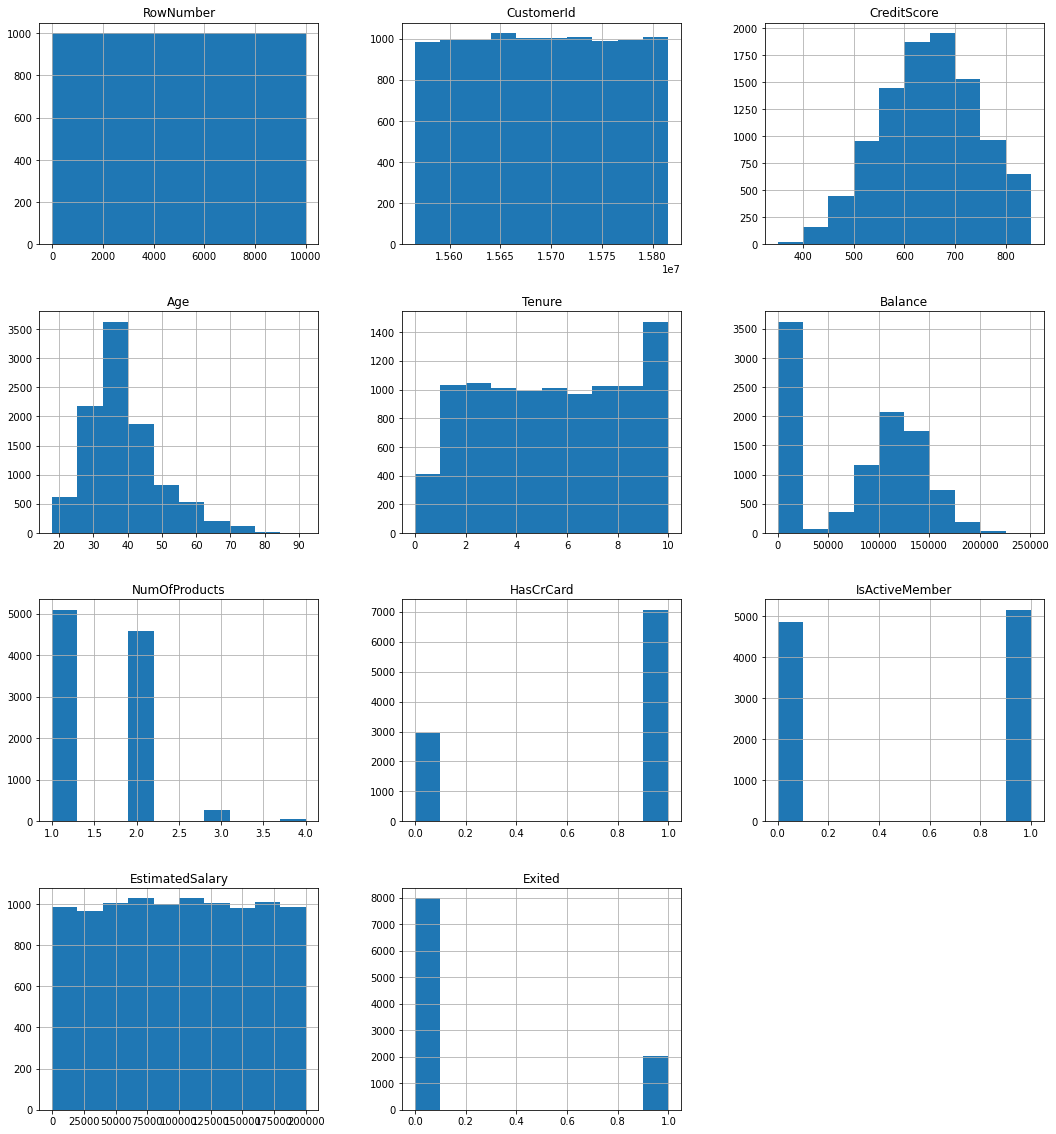

In [19]:
df.hist(figsize=(18,20))

# 4. Data Preprocess

In [20]:
# Gender, Geography column one hot encoding
df = pd.get_dummies(df, columns=['Gender', 'Geography'])
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [21]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Gender_Female', 'Gender_Male',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Age                10000 non-null  int64  
 5   Tenure             10000 non-null  int64  
 6   Balance            10000 non-null  float64
 7   NumOfProducts      10000 non-null  int64  
 8   HasCrCard          10000 non-null  int64  
 9   IsActiveMember     10000 non-null  int64  
 10  EstimatedSalary    10000 non-null  float64
 11  Exited             10000 non-null  int64  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
 14  Geography_France   10000 non-null  uint8  
 15  Geography_Germany  10000 non-null  uint8  
 16  Geography_Spain    1000

In [23]:
# RowNumber, CustomerId, Surname column drop!
df_sample_1 = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df_sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Female      10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
 11  Geography_France   10000 non-null  uint8  
 12  Geography_Germany  10000 non-null  uint8  
 13  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


## 4-1. 수치형 데이터 시각화

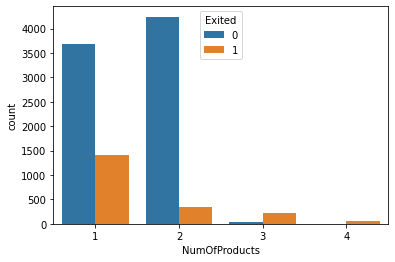

In [25]:
_ = sns.countplot(x='NumOfProducts', data=df_sample_1, hue='Exited')

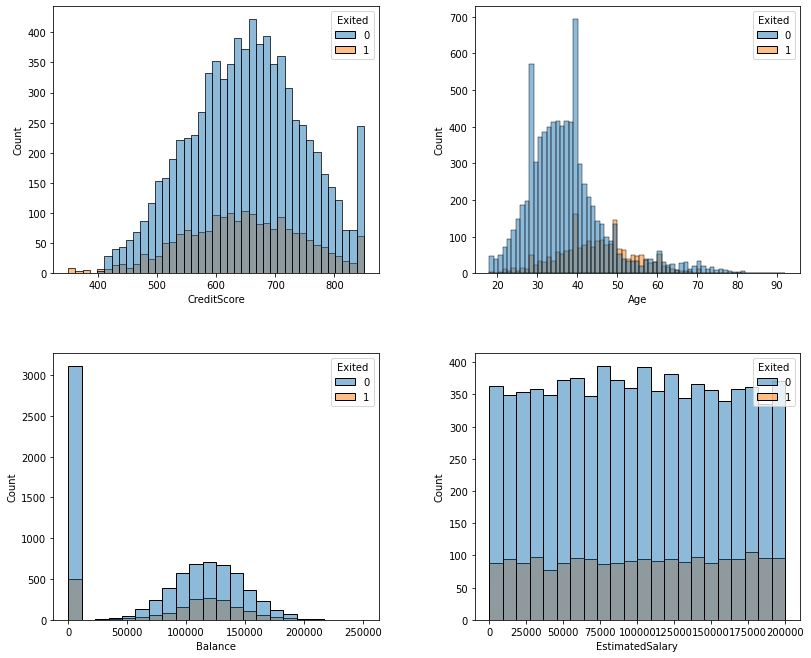

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout() # 그래프 사이에 여백 확보
fig.set_size_inches(12, 10) # 전체 크기 설정

sns.histplot(x='CreditScore', data=df_sample_1, hue='Exited', ax=axes[0, 0])
sns.histplot(x='Age', data=df_sample_1, hue='Exited', ax=axes[0, 1])
sns.histplot(x='Balance', data=df_sample_1, hue='Exited', ax=axes[1, 0])
sns.histplot(x='EstimatedSalary', data=df_sample_1, hue='Exited', ax=axes[1, 1])

plt.show()

## 4-2. 범주형 데이터 시각화

In [30]:
df_sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Female      10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
 11  Geography_France   10000 non-null  uint8  
 12  Geography_Germany  10000 non-null  uint8  
 13  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [31]:
# fig, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
# plt.tight_layout() # 그래프 사이에 여백 확보
# fig.set_size_inches(12, 10) # 전체 크기 설정

# sns.countplot(x='Geography', data=df_sample_1, hue='Exited', ax=axes[0, 0])
# sns.countplot(x='Gender', data=df_sample_1, hue='Exited', ax=axes[0, 1])
# sns.countplot(x='HasCrCard', data=df_sample_1, hue='Exited', ax=axes[1, 0])
# sns.countplot(x='IsActiveMember', data=df_sample_1, hue='Exited', ax=axes[1, 1])

# plt.show()

In [24]:
df_final = df_sample_1

## 히트맵

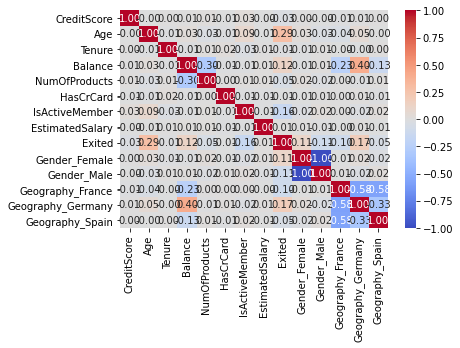

In [32]:
sns.heatmap(df_sample_1.corr(), annot=True, fmt='.2f', vmax=1, vmin=-1, cmap='coolwarm')
plt.show()

# 5. Construct model

In [64]:
import tensorflow as tf

## 5-1. input shape 

In [119]:
input_shape = X_train.shape[1]
input_shape

13

## 5-2. construct model

In [120]:
model_2  = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='relu', input_shape=[input_shape]),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss= 'binary_crossentropy',optimizer = 'Nadam', metrics=['accuracy'])

In [121]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 11)                154       
                                                                 
 dense_33 (Dense)            (None, 1)                 12        
                                                                 
Total params: 166
Trainable params: 166
Non-trainable params: 0
_________________________________________________________________


In [139]:
# 입력 레이어를 Input 레이어로 사용할 수도 있습니다.  tf.keras.layers.Input(shape=(input_shape))
# 분류와 똑같지만 회귀는 출력을 하나로 합니다.  tf.keras.layers.Dense(1)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu', input_shape=[input_shape]),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='sigmoid'),
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='sigmoid'),
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dense(units=16, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1),         
])
model_1

In [141]:
# 모델을 컴파일 합니다.
# optimizer = tf.keras.optimizers.RMSprop(0.0001)

model_1.compile(optimizer='Nadam',
             loss=["binary_crossentropy"], 
              metrics=["accuracy"])

In [140]:
# 모델을 요약합니다.
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 256)               3584      
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 128)               16512     
                                                                 
 dense_48 (Dense)            (None, 64)                8256      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_49 (Dense)            (None, 128)              

# 6. Data split

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [126]:
label_name='Exited'
X=df_final.drop(columns=label_name)
y=df_final[label_name]

# standard scaling 
ss = StandardScaler()
X[['CreditScore_ss','Balance_ss','EstimatedSalary_ss']] = ss.fit(X[['CreditScore','Balance','EstimatedSalary']]).transform(X[['CreditScore','Balance','EstimatedSalary']])

X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 16)

(8000,)

(2000, 16)

(2000,)

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Gender_Female'}>,
        <AxesSubplot:title={'center':'Gender_Male'}>,
        <AxesSubplot:title={'center':'Geography_France'}>,
        <AxesSubplot:title={'center':'Geography_Germany'}>],
       [<AxesSubplot:title={'center':'Geography_Spain'}>,
        <AxesSubplot:title={'center':'CreditScore_ss'}>,
        <AxesSubplot:title={'center':'Balance_ss'}>,
        <AxesSubplot:title={'center':'EstimatedSalary_ss'}>]],
      dtype=object)

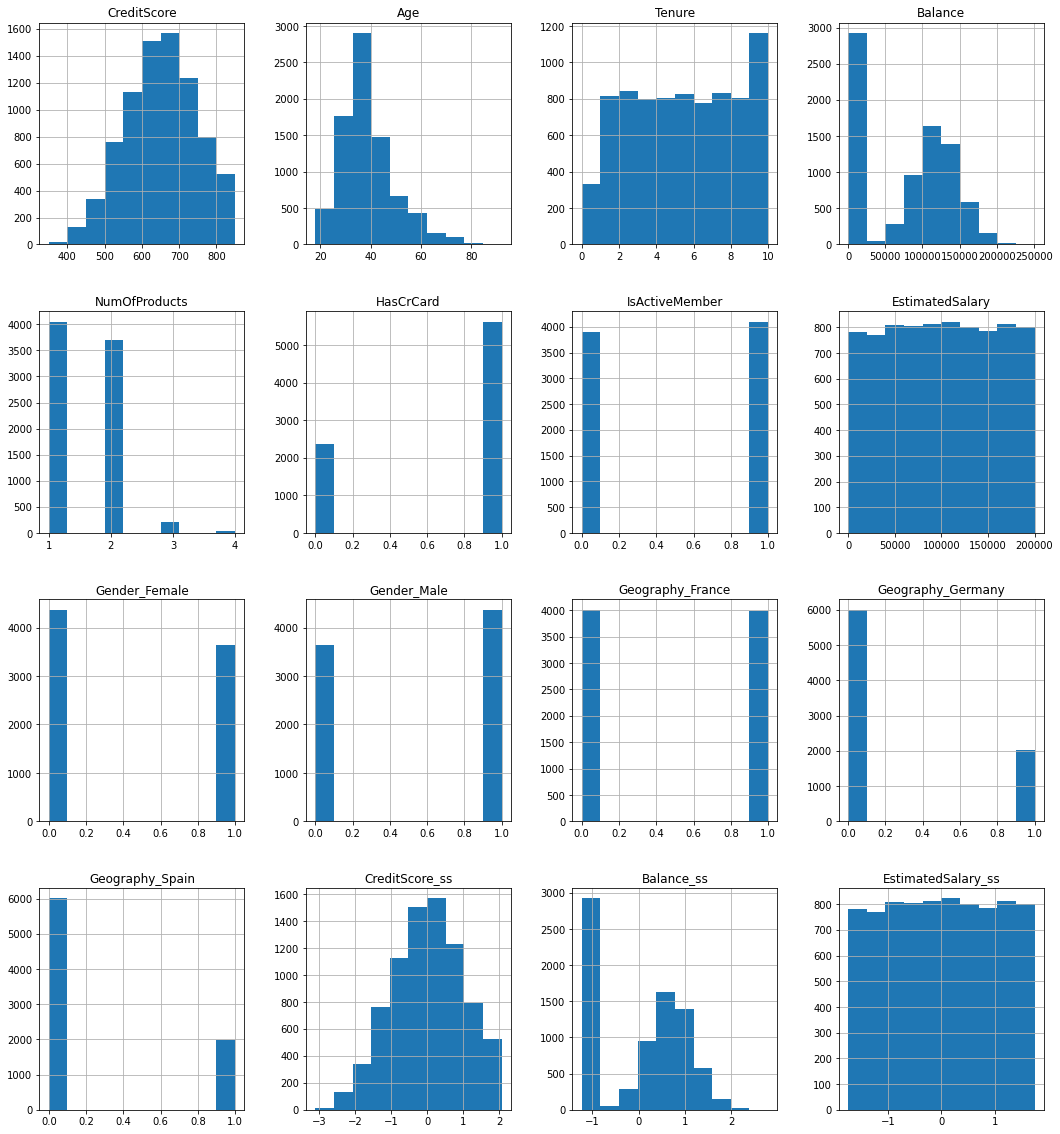

In [111]:
X_train.hist(figsize=(18,20))

In [127]:
X_train = X_train.drop(['CreditScore', 'Balance', 'EstimatedSalary'], axis=1)
X_train.columns

Index(['Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'CreditScore_ss', 'Balance_ss',
       'EstimatedSalary_ss'],
      dtype='object')

In [133]:
X_test = X_test.drop(['CreditScore', 'Balance', 'EstimatedSalary'], axis=1)
X_test.columns

Index(['Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'CreditScore_ss', 'Balance_ss',
       'EstimatedSalary_ss'],
      dtype='object')

# 7. Train Model

In [129]:
# model 2 
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
history_2 = model_2.fit(X_train, y_train, 
                    validation_split=0.2, epochs=1000, callbacks=[early_stop])


Epoch 1/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8580 - val_loss: 0.3421 - val_accuracy: 0.8562
Epoch 2/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8577 - val_loss: 0.3467 - val_accuracy: 0.8512
Epoch 3/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8600 - val_loss: 0.3466 - val_accuracy: 0.8581
Epoch 4/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.3423 - accuracy: 0.8591 - val_loss: 0.3417 - val_accuracy: 0.8562
Epoch 5/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8602 - val_loss: 0.3534 - val_accuracy: 0.8562
Epoch 6/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8600 - val_loss: 0.3426 - val_accuracy: 0.8544
Epoch 7/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.3421 - accuracy: 0.8602 - val_loss: 0.3414 - val_accuracy:

In [130]:
df_hist_2 = pd.DataFrame(history_2.history)
df_hist_2.tail()

,loss,accuracy,val_loss,val_accuracy
200,0.340905,0.861250,0.340410,0.855000
201,0.340510,0.861094,0.341634,0.858750
202,0.342606,0.859531,0.339906,0.855625
203,0.340893,0.860156,0.343907,0.858750
204,0.340607,0.861250,0.341177,0.855000


<AxesSubplot:>

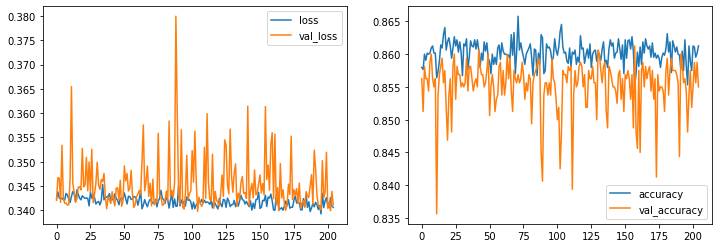

In [131]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
df_hist_2[["loss", "val_loss"]].plot(ax=axes[0])
df_hist_2[['accuracy','val_accuracy']].plot(ax=axes[1])

In [142]:
# model 1
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
history = model_1.fit(X_train, y_train, 
                    validation_split=0.2, epochs=1000, callbacks=[early_stop])

Epoch 1/1000
200/200 [==============================] - 2s 3ms/step - loss: 3.0192 - accuracy: 0.7816 - val_loss: 0.5189 - val_accuracy: 0.7987
Epoch 2/1000
200/200 [==============================] - 0s 2ms/step - loss: 1.7800 - accuracy: 0.6363 - val_loss: 0.5069 - val_accuracy: 0.7987
Epoch 3/1000
200/200 [==============================] - 0s 2ms/step - loss: 1.5913 - accuracy: 0.6263 - val_loss: 0.5137 - val_accuracy: 0.7987
Epoch 4/1000
200/200 [==============================] - 0s 2ms/step - loss: 1.6188 - accuracy: 0.7002 - val_loss: 0.5387 - val_accuracy: 0.7987
Epoch 5/1000
200/200 [==============================] - 0s 2ms/step - loss: 1.4322 - accuracy: 0.6048 - val_loss: 0.5030 - val_accuracy: 0.7987
Epoch 6/1000
200/200 [==============================] - 0s 2ms/step - loss: 1.3155 - accuracy: 0.6745 - val_loss: 0.5043 - val_accuracy: 0.7987
Epoch 7/1000
200/200 [==============================] - 0s 2ms/step - loss: 1.2460 - accuracy: 0.6681 - val_loss: 0.5458 - val_accuracy:

In [143]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
172,0.509562,0.793437,0.502131,0.79875
173,0.509551,0.793437,0.502134,0.79875
174,0.509512,0.793437,0.502278,0.79875
175,0.509468,0.793437,0.502228,0.79875
176,0.509578,0.793437,0.502217,0.79875


<AxesSubplot:>

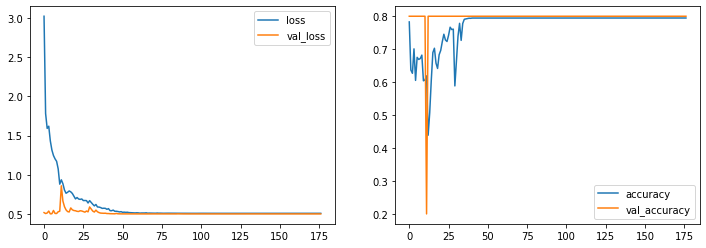

In [144]:
# 학습결과를 시각화 합니다.
# model overfitting
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
df_hist[["loss", "val_loss"]].plot(ax=axes[0])
df_hist[['accuracy','val_accuracy']].plot(ax=axes[1])

# 8. Prediction

In [148]:
pred_2 = model_2.predict(X_test)
pred_2

array([[0.03395307],
       [0.02834314],
       [0.12991083],
       ...,
       [0.68997556],
       [0.12444425],
       [0.26454872]], dtype=float32)

In [149]:
y_pred_2 = np.where(pred_2>0.5,1,0)
y_pred_2

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [150]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred_2)
score

0.8625

In [145]:
pred = model_1.predict(X_test)
pred

array([[0.2065717 ],
       [0.20657171],
       [0.2065717 ],
       ...,
       [0.2065717 ],
       [0.2065717 ],
       [0.2065717 ]], dtype=float32)

In [146]:
import numpy as np

y_pred = np.where(pred>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [147]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.8035

In [ ]:
# commit test